In [6]:
import cv2
import matplotlib as plt

from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
from bitarray import bitarray
import binascii
import base64
from PIL import Image

First, read the initial image by PIL\
P.S. cv2.imread work unexpected. I wasted a lot of time to understand, why my generated JPG image didn't open.


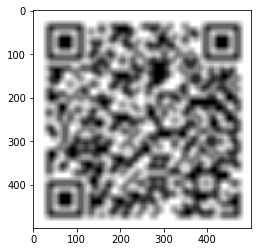

In [48]:
image = Image.open(r"D:\Jupyter\Skoltech\CI\Final exam\instructions.png")
image = np.asarray(image)
image_blurred = image
plt.imshow(image_blurred[750:1250,750:1250, 0], cmap="gray")

I tried to apply gaussian kernel and then smooth kernel, but without iterative approach, I failed. So, I decided to use iterative approach - Wiener algorithm from skimage


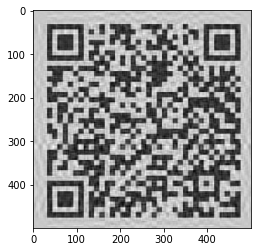

In [50]:
from scipy.signal import convolve2d
from skimage import color, data, restoration
psf = np.ones((20, 20))
out = skimage.restoration.wiener(image_blurred[750:1250,750:1250, 0], psf, 100)
plt.imshow(out, cmap="gray")

https://drive.google.com/file/d/1C1rQyR3EqLIplF5w9gGT0xR77z1ogKaz/view?usp=drivesdk

In [51]:
buffer = list()
temp_byte = bitarray()

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        for k in range(image.shape[2]):
            x = bin(image[i,j,k])
            # print(int(x[-1]))
            temp_byte.append(int(x[-1]))
            if len(temp_byte) == 8: # there is 8 bit - complete byte
                byte = temp_byte.tobytes()
                # print(temp_byte, byte)
                buffer.append(byte)
                temp_byte = bitarray()

# important thing - to use 'wb' option
with open("d:\Jupyter\Skoltech\CI\Final exam\out.jpg",'wb') as fout:
    for i, ch in enumerate(buffer):
        fout.write(ch)

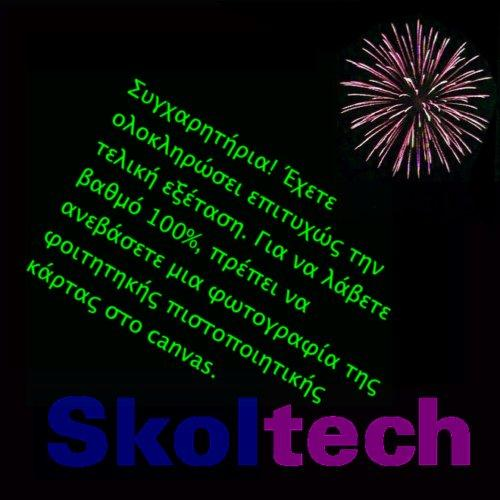

In [57]:
Image.open(r"D:\Jupyter\Skoltech\CI\Final exam\out.jpg")

So, I should upload my student ID to canvas))) Thank you so much for such course. I learned a lot for myself in such a short period of time

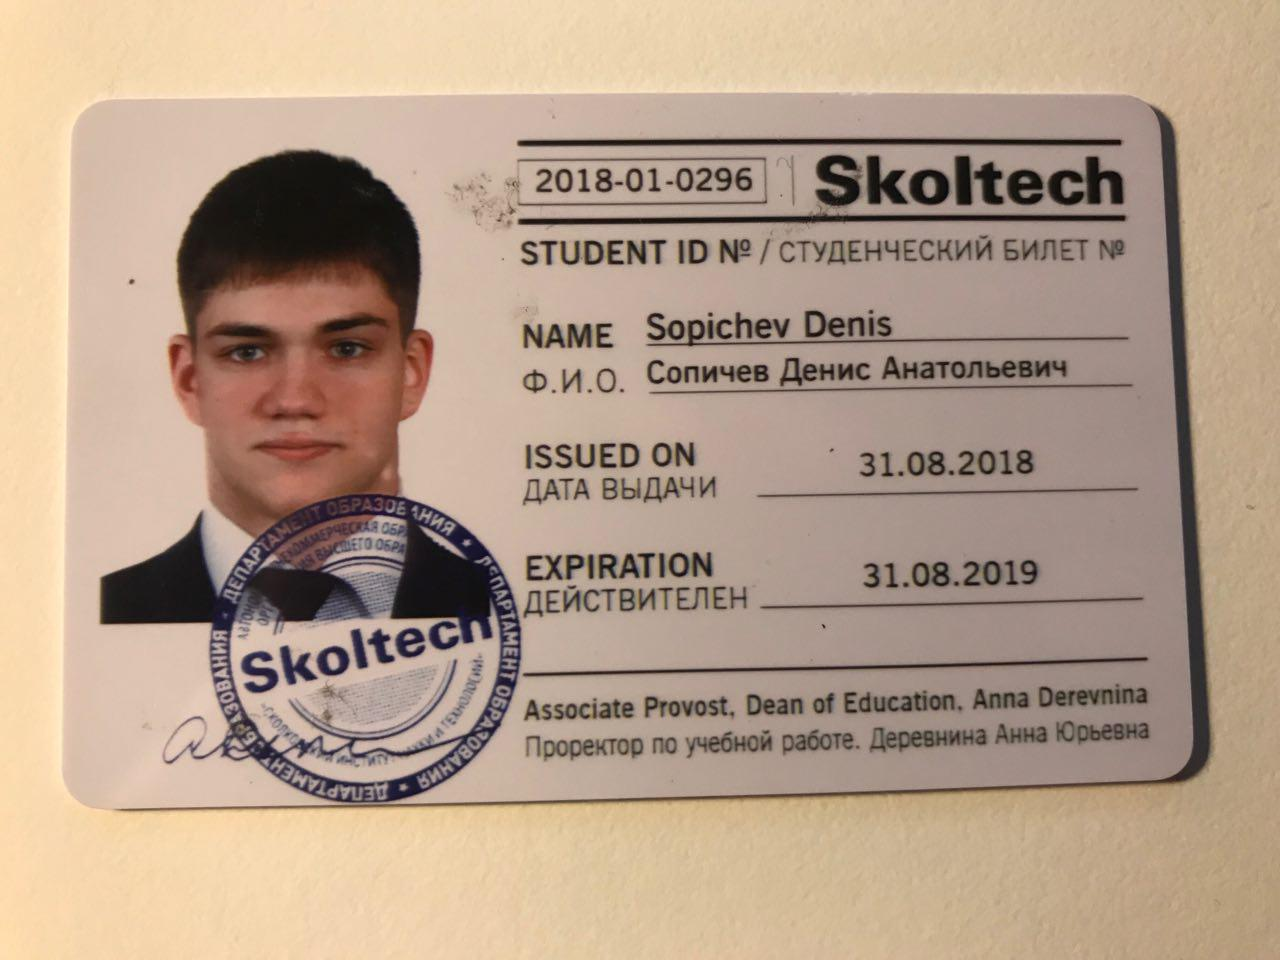

In [59]:
Image.open(r"D:\Jupyter\Skoltech\CI\Final exam\Student ID.jpg")